In [26]:
import pandas as pd
import statsmodels.api as sm

In [27]:
df = pd.read_csv("https://raw.githubusercontent.com/adiacla/bigdata/master/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [28]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
df = df.drop('Name', axis = 1)
df = df.drop('Cabin', axis = 1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S
887,888,1,1,female,19.0,0,0,112053,30.0000,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C


In [30]:
df = df.dropna()
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,382652,29.1250,Q
886,887,0,2,male,27.0,0,0,211536,13.0000,S
887,888,1,1,female,19.0,0,0,112053,30.0000,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C


In [31]:
df = df.drop('Ticket', axis = 1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [32]:
df["Sex2"] = 0
df.Sex2.loc[df.Sex=="female"] = 0
df.Sex2.loc[df.Sex=="male"] = 1
df

<ipython-input-32-d7938b177329>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex2.loc[df.Sex=="female"] = 0
<ipython-input-32-d7938b177329>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex2.loc[df.Sex=="male"] = 1


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex2
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,0
2,3,1,3,female,26.0,0,0,7.9250,S,0
3,4,1,1,female,35.0,1,0,53.1000,S,0
4,5,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q,0
886,887,0,2,male,27.0,0,0,13.0000,S,1
887,888,1,1,female,19.0,0,0,30.0000,S,0
889,890,1,1,male,26.0,0,0,30.0000,C,1


In [33]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Sex2             int64
dtype: object

In [34]:
df["EmbarkedC"] = 0
df.EmbarkedC.loc[df.Embarked=="C"] = 1
df.EmbarkedC.loc[df.Embarked!="C"] = 0
df

<ipython-input-34-def598998efa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.EmbarkedC.loc[df.Embarked=="C"] = 1
<ipython-input-34-def598998efa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.EmbarkedC.loc[df.Embarked!="C"] = 0


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex2,EmbarkedC
0,1,0,3,male,22.0,1,0,7.2500,S,1,0
1,2,1,1,female,38.0,1,0,71.2833,C,0,1
2,3,1,3,female,26.0,0,0,7.9250,S,0,0
3,4,1,1,female,35.0,1,0,53.1000,S,0,0
4,5,0,3,male,35.0,0,0,8.0500,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q,0,0
886,887,0,2,male,27.0,0,0,13.0000,S,1,0
887,888,1,1,female,19.0,0,0,30.0000,S,0,0
889,890,1,1,male,26.0,0,0,30.0000,C,1,1


In [35]:
df["EmbarkedQ"] = 0
df.EmbarkedQ.loc[df.Embarked=="Q"] = 1
df.EmbarkedQ.loc[df.Embarked!="Q"] = 0

df["EmbarkedS"] = 0
df.EmbarkedS.loc[df.Embarked=="S"] = 1
df.EmbarkedS.loc[df.Embarked!="S"] = 0

df

<ipython-input-35-5b4785959ff9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.EmbarkedQ.loc[df.Embarked=="Q"] = 1
<ipython-input-35-5b4785959ff9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.EmbarkedQ.loc[df.Embarked!="Q"] = 0
<ipython-input-35-5b4785959ff9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.EmbarkedS.loc[df.Embarked=="S"] = 1
<ipython-input-35-5b4785959ff9>:7: SettingWithCopyWarning: 
A value is trying t

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex2,EmbarkedC,EmbarkedQ,EmbarkedS
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q,0,0,1,0
886,887,0,2,male,27.0,0,0,13.0000,S,1,0,0,1
887,888,1,1,female,19.0,0,0,30.0000,S,0,0,0,1
889,890,1,1,male,26.0,0,0,30.0000,C,1,1,0,0


In [36]:
df = df.drop('Embarked', axis = 1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Sex2,EmbarkedC,EmbarkedQ,EmbarkedS
0,1,0,3,male,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,0,0,1,0
886,887,0,2,male,27.0,0,0,13.0000,1,0,0,1
887,888,1,1,female,19.0,0,0,30.0000,0,0,0,1
889,890,1,1,male,26.0,0,0,30.0000,1,1,0,0


In [37]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Sex2             int64
EmbarkedC        int64
EmbarkedQ        int64
EmbarkedS        int64
dtype: object

In [38]:
x = df.iloc[:,[2,4,5,6,7,8,9,10,11]]
y = df.Survived
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.444061
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            8
Date:                Sat, 07 Oct 2023   Pseudo R-squ.:                  0.3419
Time:                        00:59:37   Log-Likelihood:                -316.17
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 3.392e-66
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -1.1993      0.165     -7.285      0.000      -1.522      -0.877
Age           -0.0433      0.

In [39]:
print(result.prsquared)

0.341928837548777


#Desarrollo del Taller 7

In [40]:
columnas = ['Pclass', 'Age','Sex2','EmbarkedC','EmbarkedS']
X = df[columnas]
Y = df.Survived

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16)

In [42]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [43]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[75, 11],
       [18, 39]])

[[<matplotlib.axis.YTick at 0x7b65dda44e80>,
 [Text(0, 0, 'Actual 0s'), Text(0, 1, 'Actual 1s')]]

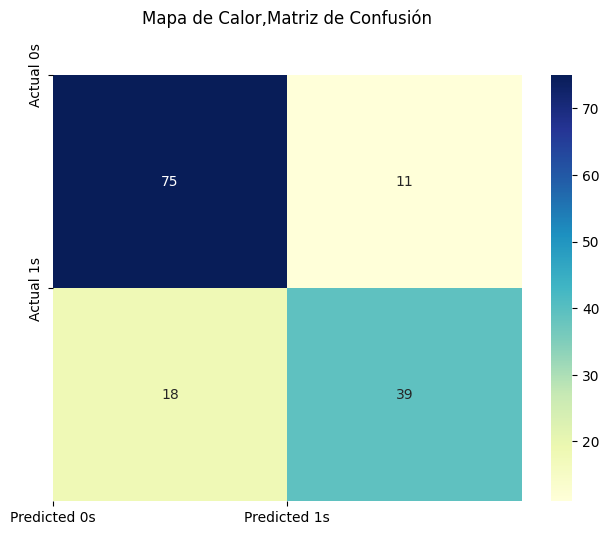

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Mapa de Calor,Matriz de Confusión', y=1.1)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        86
           1       0.78      0.68      0.73        57

    accuracy                           0.80       143
   macro avg       0.79      0.78      0.78       143
weighted avg       0.80      0.80      0.79       143

